In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix  , classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("sonar.csv")
data=pd.read_csv("sonar.csv",names=range(0,61),header=0)

In [3]:
data=pd.DataFrame(data)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [6]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

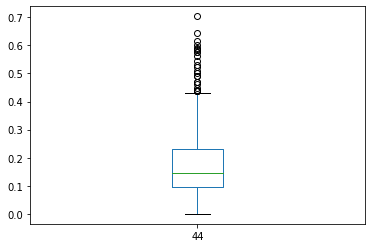

In [7]:
data[44].plot.box()

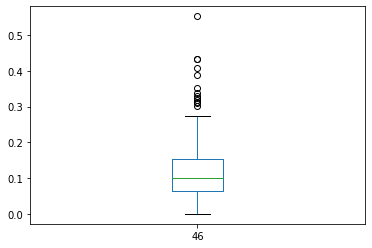

In [8]:
data[46].plot.box()

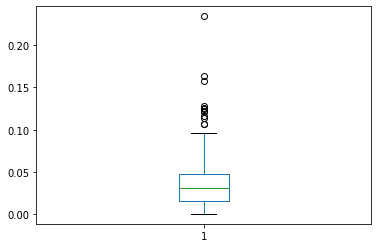

In [9]:
data[1].plot.box()

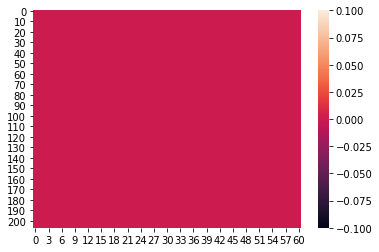

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show()

In [11]:
data.describe

<bound method NDFrame.describe of          0       1       2       3       4       5       6       7       8   \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ... 

In [12]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
5,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
6,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
7,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
8,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
9,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


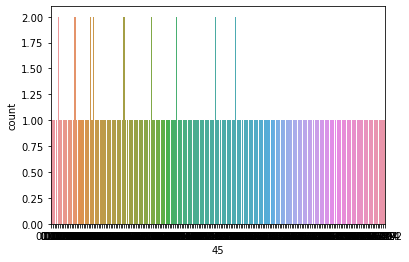

In [13]:
sns.countplot(x=45,data=data)

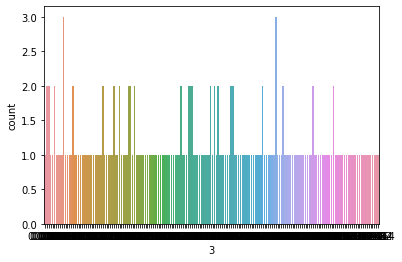

In [14]:
sns.countplot(x=3,data=data)

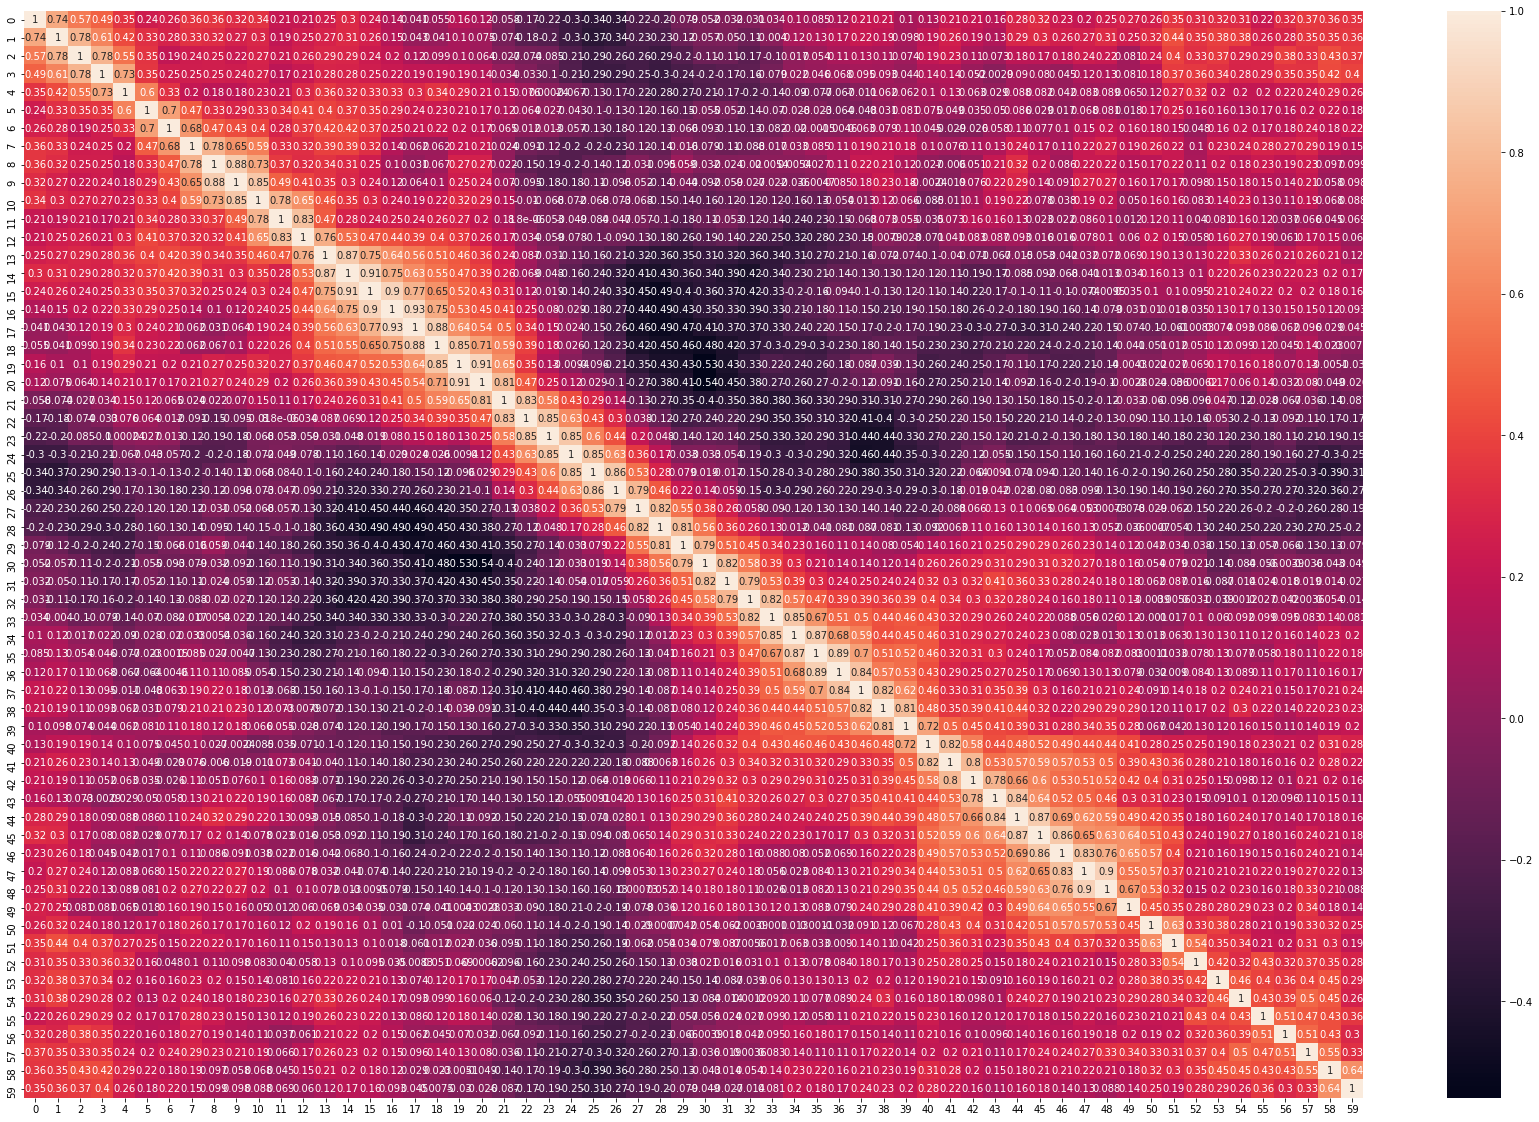

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [16]:
x=pd.DataFrame(data.iloc[:,0:-1])
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [17]:
y=pd.DataFrame(data.iloc[:,-1])
y

,60
0,R
1,R
2,R
3,R
4,R
...,...
202,M
203,M
204,M
205,M


In [18]:
y.shape

(207, 1)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
x.shape

(207, 60)

In [21]:
y.shape

(207,)

In [22]:
x.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
dtype: object

In [23]:
type(y)

numpy.ndarray

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,train_df,train_target):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

r2 score corresponding to 42 is 0.0506412493292171
r2 score corresponding to 43 is -0.6114020173013777
r2 score corresponding to 44 is 0.05745294328104744
r2 score corresponding to 45 is 0.03009705630809545
r2 score corresponding to 46 is 0.062289380101731795
r2 score corresponding to 47 is -0.1098119040551857
r2 score corresponding to 48 is 0.17758828416065797
r2 score corresponding to 49 is 0.013758098191192891
r2 score corresponding to 50 is 0.07776527484071327
r2 score corresponding to 51 is 0.1864972616285142
r2 score corresponding to 52 is 0.11957950472730638
r2 score corresponding to 53 is -0.7245806897046596
r2 score corresponding to 54 is 0.12123335512621358
r2 score corresponding to 55 is 0.08579812971811052
r2 score corresponding to 56 is -0.026197256929673784
r2 score corresponding to 57 is 0.13935901262135963
r2 score corresponding to 58 is -0.0792818327166025
r2 score corresponding to 59 is 0.03374959755003126
r2 score corresponding to 60 is -0.209699987190048
r2 score co

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [27]:
knr=KNeighborsRegressor(n_neighbors=29)
i=maxr2_score(knr,x,y)

r2 score corresponding to 42 is -0.08167525432685951
r2 score corresponding to 43 is 0.10986974752188294
r2 score corresponding to 44 is 0.14575380186494746
r2 score corresponding to 45 is 0.1811335711454618
r2 score corresponding to 46 is -0.06158343242171993
r2 score corresponding to 47 is 0.05601016106366863
r2 score corresponding to 48 is 0.04995453591662602
r2 score corresponding to 49 is 0.05330093573902683
r2 score corresponding to 50 is 0.07679349980182304
r2 score corresponding to 51 is 0.057372175980975104
r2 score corresponding to 52 is 0.08164248184437717
r2 score corresponding to 53 is -0.08111764726394033
r2 score corresponding to 54 is 0.07915746560217429
r2 score corresponding to 55 is 0.08984894525917086
r2 score corresponding to 56 is -0.0013251087704788667
r2 score corresponding to 57 is 0.18158654662816376
r2 score corresponding to 58 is 0.17789227991368295
r2 score corresponding to 59 is 0.26733856215128515
r2 score corresponding to 60 is -0.11302790795271744
r2 sc

In [28]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lr,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -0.26573737615423115
standard deviation in r2 score for Linear Regression 0.5314747523084623

Mean r2 score for KNN Regression: -0.08371123593969965
standard deviation in r2 score for KNN Regression 0.1674224718793993


In [29]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parametors,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [30]:
lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.16658205462289932
r2 score corresponding to 43 is 0.161018458281738
r2 score corresponding to 44 is 0.2435644619465499
r2 score corresponding to 45 is 0.3538795308931769
r2 score corresponding to 46 is 0.3929053288271529
r2 score corresponding to 47 is 0.2622333787864015
r2 score corresponding to 48 is 0.425292724808055
r2 score corresponding to 49 is 0.04409950955083186
r2 score corresponding to 50 is 0.265475628562736
r2 score corresponding to 51 is 0.34016057544135225
r2 score corresponding to 52 is 0.3561647982240348
r2 score corresponding to 53 is 0.020878232984764766
r2 score corresponding to 54 is 0.2775296188530957
r2 score corresponding to 55 is 0.1941281807092491
r2 score corresponding to 56 is 0.2560043670933567
r2 score corresponding to 57 is 0.4221625711555157
r2 score corresponding to 58 is 0.2704551397324244
r2 score corresponding to 59 is 0.477090382215259
r2 score corresponding to 60 is 0.07243041397089034
r2 score corresponding to 61 

In [31]:
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression: -0.1894813796401898
standard deviation in r2 score for Lasso Regression 0.3789627592803796


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [33]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=10)
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: -0.045368380915632
standard deviation in r2 score for gradient boosting Regression 0.09082258855889672


In [34]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parametors={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,lsreg,DecisionTreeRegressor()]}
clg=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [35]:
AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=10)
print("Mean r2 score for ada boosting regression:",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2score for ada boosting regression",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting regression: -0.22999173562854436
standard deviation in r2score for ada boosting regression 0.46547568056631494


In [36]:
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.3413034995884562
r2 score corresponding to 43 is 0.5957836841762557
r2 score corresponding to 44 is 0.46340708293697863
r2 score corresponding to 45 is 0.7043458453499258
r2 score corresponding to 46 is 0.6186672167119094
r2 score corresponding to 47 is 0.2971824146999378
r2 score corresponding to 48 is 0.7734752224593362
r2 score corresponding to 49 is 0.4478462844730313
r2 score corresponding to 50 is 0.603307498320474
r2 score corresponding to 51 is 0.6716148093050994
r2 score corresponding to 52 is 0.6834108501698212
r2 score corresponding to 53 is 0.49361270731540297
r2 score corresponding to 54 is 0.27286032254347337
r2 score corresponding to 55 is 0.6569509110444525
r2 score corresponding to 56 is 0.6600077748786395
r2 score corresponding to 57 is 0.812796870253838
r2 score corresponding to 58 is 0.6323325954506421
r2 score corresponding to 59 is 0.5194035332893295
r2 score corresponding to 60 is 0.2194731923292248
r2 score corresponding to 61 i

In [41]:
# we tried all and found ada booster is  best one
# getting score of .80 at 50
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.20)
ada_reg=AdaBoostRegressor()
ada_reg.fit(x,y)
y_pred=ada_reg.predict(x_test)

In [42]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.10932731870119046
r2_score is: 0.9462139182352375


In [43]:
from sklearn.externals import joblib
joblib.dump(ada_reg,"sonar_n.pkl")

['sonar_n.pkl']